# Welcome to Learn ML 2021 Grand AI Challenge! 🎉

The year 2020 has been an outlier year for finance analysts. Most of the past models have failed to give out great results on the 2020 financial data creating a need for more robust models to handle such outliers. Hence with this challenge, we wish to test your analytical modelling skills not for 1 stock but 5 to see if you have what it takes to create a model that can give predictions for the outlier 2020 year. All the best for the challenge!

The aim of this challenge is to predict the closing prices of 5 stocks using the given data.

The dataset consists of 3 files:

    new_train.csv (for training)
    new_test.csv (for test)
    new_sample_submission.csv (for sample submission format)

This data should be used to train the model, no additional data is allowed to be used for the training process.

A "new_sample_submission.csv" is also provided for ease of the participants. To know the exact submission format, please check out "Submission Guidelines".




In [ ]:
import warnings
warnings.simplefilter('ignore')

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv('drive/MyDrive/stockdata/Data/new_train.csv')
test = pd.read_csv('drive/MyDrive/stockdata/Data/new_test.csv')

In [ ]:
train = train.sort_values('Date')
test = test.sort_values('Date')

In [ ]:
train.head()

,Date,Open-Stock-1,High-Stock-1,Low-Stock-1,Close-Stock-1,VWAP-Stock-1,Volume-Stock-1,Turnover-Stock-1,Open-Stock-2,High-Stock-2,Low-Stock-2,Close-Stock-2,VWAP-Stock-2,Volume-Stock-2,Turnover-Stock-2,Open-Stock-3,High-Stock-3,Low-Stock-3,Close-Stock-3,VWAP-Stock-3,Volume-Stock-3,Turnover-Stock-3,Open-Stock-4,High-Stock-4,Low-Stock-4,Close-Stock-4,VWAP-Stock-4,Volume-Stock-4,Turnover-Stock-4,Open-Stock-5,High-Stock-5,Low-Stock-5,Close-Stock-5,VWAP-Stock-5,Volume-Stock-5,Turnover-Stock-5
0,2010-06-01,1889.7,1890.00,1838.00,1855.10,1855.75,568273,105457457545000,285.40,285.95,281.50,283.00,283.72,3191773,90557243170000,2095.00,2097.8,2045.00,2077.25,2088.95,70547,14736933230000,851.65,864.80,833.1,837.95,844.44,3878011,327474904340000,1235.0,1238.00,1177.0,1181.70,1197.29,1786082,213845404410000
1,2010-06-02,1848.0,1862.75,1828.00,1853.05,1842.82,945167,174177161135000,284.00,284.80,279.25,281.30,281.05,2704797,76017076445000,2061.45,2098.0,2023.00,2079.85,2059.52,55547,11440017990000,844.70,849.90,823.0,842.30,838.31,3320996,278403743240000,1195.0,1206.95,1168.5,1201.15,1189.87,1307410,155564994855000
2,2010-06-03,1864.1,1910.00,1864.10,1905.60,1893.91,679689,128727119355000,283.00,286.85,282.50,285.50,285.34,2489752,71043460510000,2131.50,2131.5,2091.05,2114.90,2107.84,55130,11620529360000,851.40,859.05,848.2,854.10,853.51,2494522,212910342645000,1211.0,1248.00,1211.0,1242.30,1231.63,1482919,182640434320000
3,2010-06-04,1906.0,1909.80,1880.10,1885.70,1889.21,509435,96242800140000,288.85,291.80,277.00,290.85,289.81,3188813,92414802585000,2114.90,2156.0,2095.50,2146.75,2145.36,29302,6286330280000,854.10,868.60,854.1,865.85,862.85,2963920,255740999120000,1240.0,1258.00,1240.0,1245.45,1249.72,1454459,181767075850000
4,2010-06-07,1867.0,1894.85,1808.35,1876.65,1873.32,961913,180196832650000,285.00,289.10,285.00,287.70,287.01,2198836,63109395135000,2132.35,2209.0,2112.00,2185.25,2180.52,78919,17208425860000,712.00,850.00,712.0,841.95,839.89,3471483,291567400640000,1218.6,1225.00,1196.0,1214.80,1209.27,1424594,172272511430000


###### Meaning of VWAP,Volume and Turnover of a stock

* **Volume Weighted Average Price (VWAP)?**

The volume weighted average price (VWAP) is a trading benchmark used by traders that gives the average price a security has traded at throughout the day, based on both volume and price. It is important because it provides traders with insight into both the trend and value of a security. 

                                    VWAP =(∑(Price * Volume))/∑Volume

* **Volume** is measured in the number of shares traded on that day.
* **Stock Turnover** is the rate at which a company's goods are sold and replaced.


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 298
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              299 non-null    object 
 1   Open-Stock-1      299 non-null    float64
 2   High-Stock-1      299 non-null    float64
 3   Low-Stock-1       299 non-null    float64
 4   Close-Stock-1     299 non-null    float64
 5   VWAP-Stock-1      299 non-null    float64
 6   Volume-Stock-1    299 non-null    int64  
 7   Turnover-Stock-1  299 non-null    int64  
 8   Open-Stock-2      299 non-null    float64
 9   High-Stock-2      299 non-null    float64
 10  Low-Stock-2       299 non-null    float64
 11  Close-Stock-2     299 non-null    float64
 12  VWAP-Stock-2      299 non-null    float64
 13  Volume-Stock-2    299 non-null    int64  
 14  Turnover-Stock-2  299 non-null    int64  
 15  Open-Stock-3      299 non-null    float64
 16  High-Stock-3      299 non-null    float64
 1

In [ ]:
train.isna().sum()

Date                0
Open-Stock-1        0
High-Stock-1        0
Low-Stock-1         0
Close-Stock-1       0
VWAP-Stock-1        0
Volume-Stock-1      0
Turnover-Stock-1    0
Open-Stock-2        0
High-Stock-2        0
Low-Stock-2         0
Close-Stock-2       0
VWAP-Stock-2        0
Volume-Stock-2      0
Turnover-Stock-2    0
Open-Stock-3        0
High-Stock-3        0
Low-Stock-3         0
Close-Stock-3       0
VWAP-Stock-3        0
Volume-Stock-3      0
Turnover-Stock-3    0
Open-Stock-4        0
High-Stock-4        0
Low-Stock-4         0
Close-Stock-4       0
VWAP-Stock-4        0
Volume-Stock-4      0
Turnover-Stock-4    0
Open-Stock-5        0
High-Stock-5        0
Low-Stock-5         0
Close-Stock-5       0
VWAP-Stock-5        0
Volume-Stock-5      0
Turnover-Stock-5    0
dtype: int64

In [ ]:
train['Date'] = train['Date'].astype('datetime64')
test['Date'] = test['Date'].astype('datetime64')

###### Converting the Date column into Day,Month,Year

# Trying LSTM

* Take last 20 datapoints from the train set to predict the first future value.

* We will make a prediction based on those values.

* Add this prediction to the above list to now have 21 values.

* Remove the first value of the above list to again have only 20 elements in the list.

* Now use these 20 values to make the next prediction.

* We have to make 97 predictions.

In [ ]:
stock1 = train[['Open-Stock-1', 'High-Stock-1', 'Low-Stock-1', 'Close-Stock-1','VWAP-Stock-1', 'Volume-Stock-1', 'Turnover-Stock-1']]
stock2 = train[['Open-Stock-2', 'High-Stock-2', 'Low-Stock-2', 'Close-Stock-2','VWAP-Stock-2', 'Volume-Stock-2', 'Turnover-Stock-2']]
stock3 = train[['Open-Stock-3', 'High-Stock-3', 'Low-Stock-3', 'Close-Stock-3','VWAP-Stock-3', 'Volume-Stock-3', 'Turnover-Stock-3']]
stock4 = train[['Open-Stock-4', 'High-Stock-4', 'Low-Stock-4', 'Close-Stock-4','VWAP-Stock-4', 'Volume-Stock-4', 'Turnover-Stock-4']]
stock5 = train[['Open-Stock-5', 'High-Stock-5', 'Low-Stock-5', 'Close-Stock-5','VWAP-Stock-5', 'Volume-Stock-5', 'Turnover-Stock-5']]

In [ ]:
tstock1 = test[['Open-Stock-1', 'High-Stock-1', 'Low-Stock-1','VWAP-Stock-1', 'Volume-Stock-1', 'Turnover-Stock-1']]
tstock2 = test[['Open-Stock-2', 'High-Stock-2', 'Low-Stock-2','VWAP-Stock-2', 'Volume-Stock-2', 'Turnover-Stock-2']]
tstock3 = test[['Open-Stock-3', 'High-Stock-3', 'Low-Stock-3','VWAP-Stock-3', 'Volume-Stock-3', 'Turnover-Stock-3']]
tstock4 = test[['Open-Stock-4', 'High-Stock-4', 'Low-Stock-4','VWAP-Stock-4', 'Volume-Stock-4', 'Turnover-Stock-4']]
tstock5 = test[['Open-Stock-5', 'High-Stock-5', 'Low-Stock-5','VWAP-Stock-5', 'Volume-Stock-5', 'Turnover-Stock-5']]

# Task: To create xtrain and ytrain for our LSTM network

* Set your time step value
* Create a loop for range len(data)-time_step
* for xtrain pick up  i:i+timestep records from dataset excluding close stock.
* for ytrain pick up timestep+i close stock value
* reshape the xtrain and ytrain to have 3 dimensions.

In [ ]:
stock = stock1
tstock = tstock1
target = 'Close-Stock-1'
epochs = 180
time_step = 4

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
s1_train = mm.fit_transform(stock[:round(len(stock)*0.65)].drop(target,axis = 1).values)
s1_test =  mm.fit_transform(stock[round(len(stock)*0.65):].drop(target,axis = 1).values)
s1_train_targ =  mm.fit_transform(stock[:round(len(stock)*0.65)][target].values.reshape(-1,1))
s1_test_targ =  mm.fit_transform(stock[round(len(stock)*0.65):][target].values.reshape(-1,1))

s1_train.shape,s1_test.shape,s1_train_targ.shape,s1_test_targ.shape


#Trying with all data. No validation set
t1 = mm.fit_transform(stock[:round(len(stock))].drop(target,axis = 1).values)
tt1 =  mm.fit_transform(stock[:round(len(stock))][target].values.reshape(-1,1))
t1.shape,tt1.shape

((299, 6), (299, 1))

In [ ]:
def time_seriesdata(independent,dependent,time_step):
  x,y = [],[]

  for i in range(len(dependent)-time_step):
    x.append(independent[i:(time_step+i)])
    y.append(dependent[time_step+i])
  return np.array(x),np.array(y)

In [ ]:
x_train,y_train = time_seriesdata(t1,tt1,time_step)

In [ ]:
# x_train,y_train = time_seriesdata(s1_train,s1_train_targ,time_step)
# x_test,y_test = time_seriesdata(s1_test,s1_test_targ,time_step)

In [ ]:
y_train.shape

(295, 1)

In [ ]:
def reshape(var):
  return var.reshape(var.shape[0])

In [ ]:
ytrain = reshape(y_train)
#ytest = reshape(y_test)

In [ ]:
def xreshape(var):
  return var.reshape(var.shape[0],-1,1)

In [ ]:
xtrain = xreshape(x_train)
#xtest = xreshape(x_test)
xtrain.shape
#xtest.shape

(295, 24, 1)

# Next Step is to create the LSTM stack

In [ ]:
#Stacked LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM,Dropout
model = Sequential()
model.add(LSTM(xtrain.shape[1], return_sequences=True,input_shape=(xtrain.shape[1], 1)))
model.add(LSTM(xtrain.shape[1],return_sequences=True))
model.add(LSTM(xtrain.shape[1]))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer = 'adam')

In [ ]:
model.fit(xtrain,ytrain,epochs = epochs,batch_size = 64)

Epoch 1/180
5/5 [==============================] - 5s 31ms/step - loss: 0.5606
Epoch 2/180
5/5 [==============================] - 0s 32ms/step - loss: 0.2815
Epoch 3/180
5/5 [==============================] - 0s 30ms/step - loss: 0.0425
Epoch 4/180
5/5 [==============================] - 0s 28ms/step - loss: 0.0692
Epoch 5/180
5/5 [==============================] - 0s 30ms/step - loss: 0.0264
Epoch 6/180
5/5 [==============================] - 0s 29ms/step - loss: 0.0215
Epoch 7/180
5/5 [==============================] - 0s 31ms/step - loss: 0.0287
Epoch 8/180
5/5 [==============================] - 0s 33ms/step - loss: 0.0138
Epoch 9/180
5/5 [==============================] - 0s 31ms/step - loss: 0.0150
Epoch 10/180
5/5 [==============================] - 0s 33ms/step - loss: 0.0181
Epoch 11/180
5/5 [==============================] - 0s 33ms/step - loss: 0.0149
Epoch 12/180
5/5 [==============================] - 0s 32ms/step - loss: 0.0129
Epoch 13/180
5/5 [==============================]

# Now make predictions on the train set to see model performance

In [ ]:
train_predict = model.predict(xtrain)
# test_predict = model.predict(xtest)

In [ ]:
train_predict = reshape(train_predict)
# test_predict = reshape(test_predict)

In [ ]:
train_y_trans = mm.inverse_transform(ytrain.reshape(-1,1))
#test_y_trans = pd.Series(np.squeeze(mm.inverse_transform(y_test.reshape(1,-1))),index = list(range(xtrain.shape[0],xtrain.shape[0]+xtest.shape[0])))
train_predict_trans = mm.inverse_transform(train_predict.reshape(-1,1))
#test_predict_trans = pd.Series(np.squeeze(mm.inverse_transform(test_predict.reshape(-1,1)).reshape(1,-1)),index = list(range(xtrain.shape[0],xtrain.shape[0]+xtest.shape[0])))

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(mm.inverse_transform(y_train.reshape(-1,1)),train_predict_trans))

149.07945935842935

In [ ]:
# from sklearn.metrics import mean_squared_error
# np.sqrt(mean_squared_error(mm.inverse_transform(y_test.reshape(-1,1)),test_predict_trans))

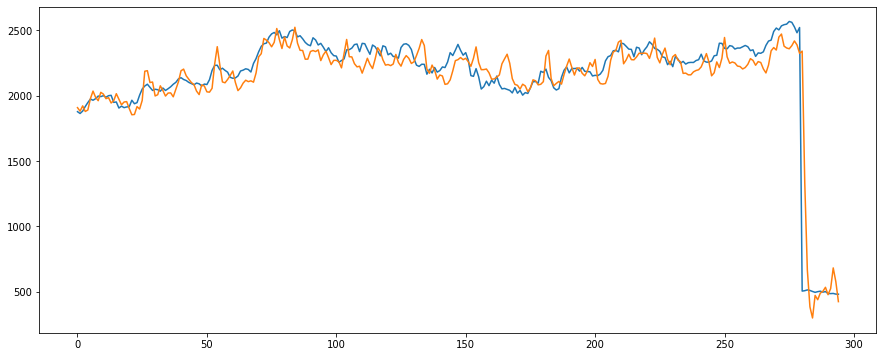

In [ ]:
plt.figure(figsize = (15,6))
plt.plot(train_y_trans)
#plt.plot(test_y_trans)


plt.plot(train_predict_trans)
#plt.plot(test_predict_trans)
plt.show()

In [ ]:
# t = mm.inverse_transform(ytrain.reshape(-1,1))
# tp = pd.Series(np.squeeze(train_predict))
# inv = mm.inverse_transform(ytest.reshape(-1,1))
# tt = pd.Series(np.squeeze(inv.reshape(1,-1)),range(ytrain.shape[0]+1,ytrain.shape[0]+xtest.shape[0]+1))
# ttp = pd.Series(np.squeeze(test_predict),index = range(ytrain.shape[0]+1,ytrain.shape[0]+xtest.shape[0]+1))


# Introduce your submission file and make predictions

* Select last time_step records from the train data to predict the first value of the test data.

* Now remove the 4th last row from the predicting values and add the first row of data from test set to predict the next record.

* Do this for 97 records.

* Remember to concatinate the test data and fit it with the entire data and not just with the testset alone. So that Min Max would not consider the lower value as high!!!!!!!!

In [ ]:
new_dataset = mm.fit_transform(pd.concat((stock.drop(target,axis = 1),tstock)))[len(stock)-(time_step):]

In [ ]:
len(new_dataset)

101

In [ ]:
def fortest_time_seriesdata(independent,time_step):
  x = []

  for i in range(len(independent)-time_step):
    x.append(independent[i:(time_step+i)])
  return np.array(x)

In [ ]:
testing1 = fortest_time_seriesdata(new_dataset,time_step)

In [ ]:
testing = xreshape(testing1)

In [ ]:
predictions = model.predict(testing)
pred = reshape(predictions)

In [ ]:
# s1_train_targ =  mm.fit_transform(stock[:round(len(stock)*0.65)][target].values.reshape(-1,1))
# s1_test_targ =  mm.fit_transform(stock[round(len(stock)*0.65):][target].values.reshape(-1,1))

In [ ]:
s1_train_targ =  mm.fit_transform(stock[:round(len(stock))][target].values.reshape(-1,1))
#s1_test_targ =  mm.fit_transform(stock[round(len(stock)):][target].values.reshape(-1,1))

In [ ]:
stock_predictions = pd.Series(mm.inverse_transform(pred.reshape(-1,1)).reshape(-1))

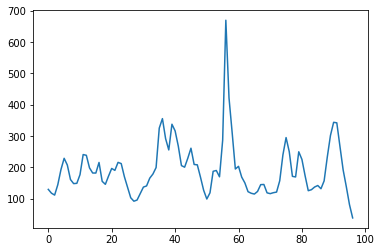

In [ ]:
stock_predictions.plot()

In [ ]:
pd.DataFrame(stock_predictions.values)

,0
0,129.843689
1,117.693329
2,111.675690
3,144.855576
4,193.226059
...,...
92,266.421783
93,191.877396
94,138.387634
95,81.150894


In [ ]:
stock = stock2
tstock = tstock2
target = 'Close-Stock-2'
epochs = 1800

In [ ]:
def stock_prediction(stock,tstock,target,epochs,time_step):
  
  from sklearn.preprocessing import MinMaxScaler
  from sklearn.metrics import mean_squared_error
  from tensorflow.keras.models import Sequential
  from tensorflow.keras.layers import Dense
  from tensorflow.keras.layers import LSTM,Dropout
  
  time_step = time_step

  
  mm = MinMaxScaler()
  s1_train = mm.fit_transform(stock[:round(len(stock)*0.65)].drop(target,axis = 1).values)
  s1_test =  mm.fit_transform(stock[round(len(stock)*0.65):].drop(target,axis = 1).values)
  s1_train_targ =  mm.fit_transform(stock[:round(len(stock)*0.65)][target].values.reshape(-1,1))
  s1_test_targ =  mm.fit_transform(stock[round(len(stock)*0.65):][target].values.reshape(-1,1))

  def time_seriesdata(independent,dependent,time_step):
    x,y = [],[]

    for i in range(len(dependent)-time_step):
      x.append(independent[i:(time_step+i)])
      y.append(dependent[time_step+i])
    return np.array(x),np.array(y)

    x_train,y_train = time_seriesdata(s1_train,s1_train_targ,time_step)
    x_test,y_test = time_seriesdata(s1_test,s1_test_targ,time_step)

  def reshape(var):
    return var.reshape(var.shape[0])

  def xreshape(var):
    return var.reshape(var.shape[0],-1,1)

  ytrain,ytest,xtrain,xtest = reshape(y_train),reshape(y_test),xreshape(x_train),xreshape(x_test)

  #Stacked LSTM
  
  model = Sequential()
  model.add(LSTM(time_step, return_sequences=True,input_shape=(xtrain.shape[1], 1)))
  model.add(LSTM(time_step,return_sequences=True))
  model.add(LSTM(time_step))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error',optimizer = 'adam')

  model.fit(xtrain,ytrain,epochs = epochs,validation_data=(xtest,ytest),batch_size = 64)

  train_predict = reshape(model.predict(xtrain))
  test_predict = reshape(model.predict(xtest))

  train_y_trans = mm.inverse_transform(ytrain.reshape(-1,1))
  test_y_trans = pd.Series(np.squeeze(mm.inverse_transform(y_test.reshape(1,-1))),index = list(range(xtrain.shape[0],xtrain.shape[0]+xtest.shape[0])))
  train_predict_trans = mm.inverse_transform(train_predict.reshape(-1,1))
  test_predict_trans = pd.Series(np.squeeze(mm.inverse_transform(test_predict.reshape(-1,1)).reshape(1,-1)),index = list(range(xtrain.shape[0],xtrain.shape[0]+xtest.shape[0])))

  train_score = np.sqrt(mean_squared_error(mm.inverse_transform(y_train.reshape(-1,1)),train_predict_trans))
  test_score = np.sqrt(mean_squared_error(mm.inverse_transform(y_test.reshape(-1,1)),test_predict_trans))


  #Using new data to make predictions

  new_dataset = mm.fit_transform(pd.concat((stock.drop(target,axis = 1),tstock)))[len(stock)-(time_step):]

  def fortest_time_seriesdata(independent,time_step):
    x = []

    for i in range(len(independent)-time_step):
      x.append(independent[i:(time_step+i)])
    return np.array(x)

  testing1 = fortest_time_seriesdata(new_dataset,time_step)
  testing = xreshape(testing1)
  predictions = model.predict(testing)
  pred = reshape(predictions)

  s1_train_targ =  mm.fit_transform(stock[:round(len(stock)*0.65)][target].values.reshape(-1,1))
  s1_test_targ =  mm.fit_transform(stock[round(len(stock)*0.65):][target].values.reshape(-1,1))

  stock_predictions = mm.inverse_transform(pred.reshape(-1,1)).reshape(-1)
  return stock_predictions

In [ ]:
stock1 = train[['Open-Stock-1', 'High-Stock-1', 'Low-Stock-1', 'Close-Stock-1','VWAP-Stock-1', 'Volume-Stock-1', 'Turnover-Stock-1']]
stock2 = train[['Open-Stock-2', 'High-Stock-2', 'Low-Stock-2', 'Close-Stock-2','VWAP-Stock-2', 'Volume-Stock-2', 'Turnover-Stock-2']]
stock3 = train[['Open-Stock-3', 'High-Stock-3', 'Low-Stock-3', 'Close-Stock-3','VWAP-Stock-3', 'Volume-Stock-3', 'Turnover-Stock-3']]
stock4 = train[['Open-Stock-4', 'High-Stock-4', 'Low-Stock-4', 'Close-Stock-4','VWAP-Stock-4', 'Volume-Stock-4', 'Turnover-Stock-4']]
stock5 = train[['Open-Stock-5', 'High-Stock-5', 'Low-Stock-5', 'Close-Stock-5','VWAP-Stock-5', 'Volume-Stock-5', 'Turnover-Stock-5']]

In [ ]:
tstock1 = test[['Open-Stock-1', 'High-Stock-1', 'Low-Stock-1','VWAP-Stock-1', 'Volume-Stock-1', 'Turnover-Stock-1']]
tstock2 = test[['Open-Stock-2', 'High-Stock-2', 'Low-Stock-2','VWAP-Stock-2', 'Volume-Stock-2', 'Turnover-Stock-2']]
tstock3 = test[['Open-Stock-3', 'High-Stock-3', 'Low-Stock-3','VWAP-Stock-3', 'Volume-Stock-3', 'Turnover-Stock-3']]
tstock4 = test[['Open-Stock-4', 'High-Stock-4', 'Low-Stock-4','VWAP-Stock-4', 'Volume-Stock-4', 'Turnover-Stock-4']]
tstock5 = test[['Open-Stock-5', 'High-Stock-5', 'Low-Stock-5','VWAP-Stock-5', 'Volume-Stock-5', 'Turnover-Stock-5']]

In [ ]:
epochs = 1800
step = 4
s1 = pd.Series(stock_prediction(stock1,tstock1,'Close-Stock-1',epochs = epochs,time_step = step))
s2 = pd.Series(stock_prediction(stock2,tstock2,'Close-Stock-2',epochs = epochs,time_step = step))
s3 = pd.Series(stock_prediction(stock3,tstock3,'Close-Stock-3',epochs = epochs,time_step = step))
s4 = pd.Series(stock_prediction(stock4,tstock4,'Close-Stock-4',epochs = epochs,time_step = step))
s5 = pd.Series(stock_prediction(stock5,tstock5,'Close-Stock-5',epochs = epochs,time_step = step))
submission = pd.concat((test['Date'],s1,s2,s3,s4,s5),axis = 1)

NameError: ignored

In [ ]:
submission = pd.concat((test['Date'],s1,s2,s3,s4,s5),axis = 1)
submission = submission.rename(columns = {'Date':'Date',0:'Close-Stock-1',1:'Close-Stock-2',2:'Close-Stock-3',3:'Close-Stock-4',4:'Close-Stock-5'})

In [ ]:
submission.to_csv('TestSubmission.csv',index = False)